In [29]:
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import sys
sys.path.append('/nethome/storage/raid2/o.okewale/damask/python')

In [13]:
import os
import pandas as pd
import damask
import h5py
import numpy as np

In [57]:
sample_name = 'Polycrystal_512_26x26x26'
simulation_folder = f'/nethome/o.okewale/examples/sim_results/{sample_name}/simulation'
os.chdir(simulation_folder)
!pwd

/nethome/storage/raid2/o.okewale/examples/sim_results/Polycrystal_512_26x26x26/simulation


In [58]:
d = damask.Result(f'{simulation_folder}/{sample_name}_tensionX.hdf5')
f = h5py.File(d.fname, mode='r')
# a = d.get_dataset_location('r_s')
# rs = (f[a[-1]])
F_11 = f[d.get_dataset_location('F')[-1]]
P_11 = f[d.get_dataset_location('P')[-1]]
# print(F_11[:,0,0])
# print(P_11[:,0,0])

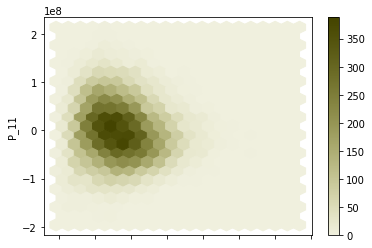

In [59]:
df = pd.DataFrame({'F_11':F_11[:,0,0],
                   'P_11':P_11[:,0,0]})
_ = df.plot.hexbin(x='F_11',y='P_11',gridsize=20,
                   cmap=damask.Colormap.from_predefined('strain'))